In [9]:
def middle(x, y, z):
    if y < z:
        if x < y:
            return y
        elif x < z:
            return y
    else:
        if x > y:
            return y
        elif x > z:
            return x
    return z

In [10]:
import inspect

In [19]:
source = inspect.getsource(middle)
print(source)

def middle(x, y, z):
    if y < z:
        if x < y:
            return y
        elif x < z:
            return y
    else:
        if x > y:
            return y
        elif x > z:
            return x
    return z


In [20]:
middle_py = 'middle.py'
tmp_py = 'tmp.py'

In [21]:
with open(middle_py, 'w') as fp:
    fp.write("import sys\n\n" + source + """

if __name__ == "__main__":
    print(middle(*list(map(int, sys.argv[1:]))))

""")

In [22]:
from stato.events import instrument

In [23]:
instrument(middle_py, tmp_py)

sflkit :: INFO     :: I found 65 events in middle.py.
sflkit :: INFO     :: I found 0 events in middle.py.


In [24]:
with open(tmp_py, 'r') as fp:
    print(fp.read())

import sflkitlib.lib
sflkitlib.lib.add_line_event('middle.py', 1, 0)
import sys

def middle(x, y, z):
    try:
        sflkitlib.lib.add_function_enter_event('middle.py', 3, 1, 2, 'middle')
        sd_tmp_96ad5f5b_0 = None
        sflkitlib.lib.add_def_event('middle.py', 3, 3, 'x', sflkitlib.lib.get_id(x), x, sflkitlib.lib.get_type(x))
        sflkitlib.lib.add_def_event('middle.py', 3, 4, 'y', sflkitlib.lib.get_id(y), y, sflkitlib.lib.get_type(y))
        sflkitlib.lib.add_def_event('middle.py', 3, 5, 'z', sflkitlib.lib.get_id(z), z, sflkitlib.lib.get_type(z))
        sflkitlib.lib.add_line_event('middle.py', 4, 6)
        try:
            sflkitlib.lib.add_use_event('middle.py', 4, 9, 'y', sflkitlib.lib.get_id(y))
        except (AttributeError, TypeError, NameError):
            pass
        try:
            sflkitlib.lib.add_use_event('middle.py', 4, 10, 'z', sflkitlib.lib.get_id(z))
        except (AttributeError, TypeError, NameError):
            pass
        sd_tmp_96ad5f5b_1 =

In [25]:
import subprocess

In [26]:
subprocess.run(["python", middle_py, "2", "3", "1"])

2


CompletedProcess(args=['python', 'middle.py', '2', '3', '1'], returncode=0)

In [29]:
from stato.events import SystemtestEventCollector
from stato.features import Handler
import os

In [52]:
passing, failing = (
    [["3", "3", "5"], ["1", "2", "3"], ["3", "2", "1"], ["5", "5", "1"], ["5", "3", "4"], ["-1", "-1", "4"]], 
    [["2", "1", "3"], ["2", "-1", "3"]]
)

In [53]:
collector = SystemtestEventCollector(os.getcwd(), tmp_py)
events = collector.get_events((passing, failing))
handler = Handler()
handler.handle_files(events)
all_features = handler.feature_builder.get_all_features()

In [54]:
from stato.learning import DecisionTree

In [55]:
oracle = DecisionTree()
oracle.fit(
    all_features,
    handler.feature_builder.get_vectors(),
)

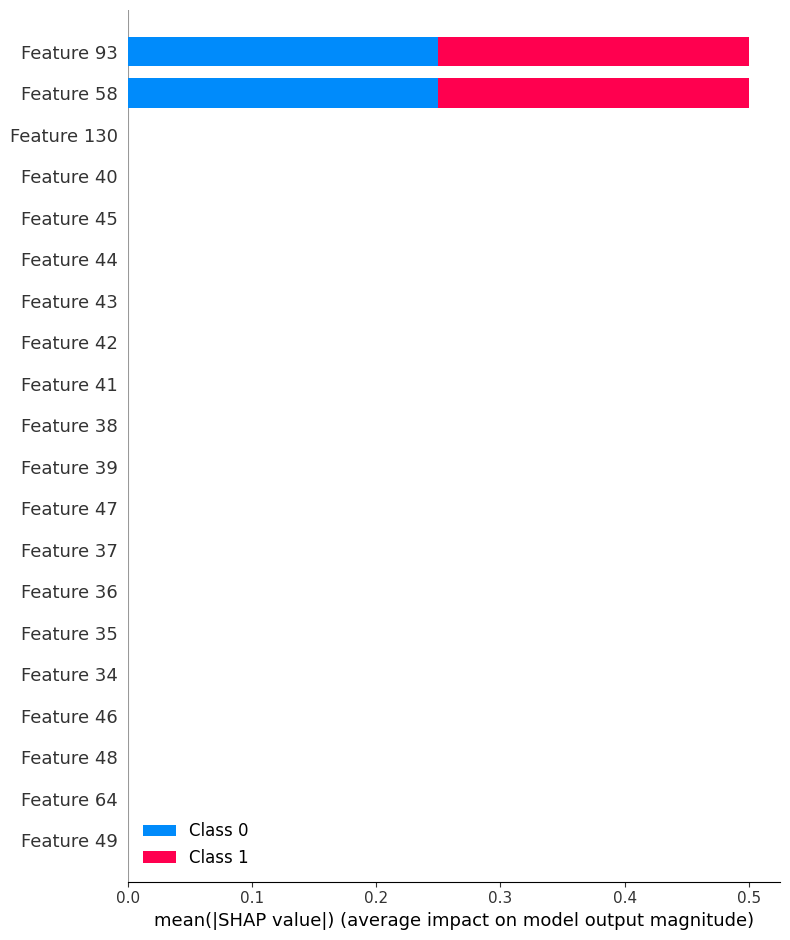

In [56]:
oracle.explain(oracle.x_train)

In [61]:
all_features[93], all_features[58]

(SCALAR_PAIR:middle.py:3:yGEx, LINE:middle.py:8)

In [57]:
from sklearn import tree

[Text(0.4, 0.8333333333333334, 'LINE:middle.py:8 <= 0.5\nlog_loss = 0.811\nsamples = 8\nvalue = [6, 2]\nclass = No Bug'),
 Text(0.2, 0.5, 'log_loss = 0.0\nsamples = 4\nvalue = [4, 0]\nclass = No Bug'),
 Text(0.6, 0.5, 'SCALAR_PAIR:middle.py:3:yGEx <= 0.5\nlog_loss = 1.0\nsamples = 4\nvalue = [2, 2]\nclass = No Bug'),
 Text(0.4, 0.16666666666666666, 'log_loss = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = Bug'),
 Text(0.8, 0.16666666666666666, 'log_loss = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = No Bug')]

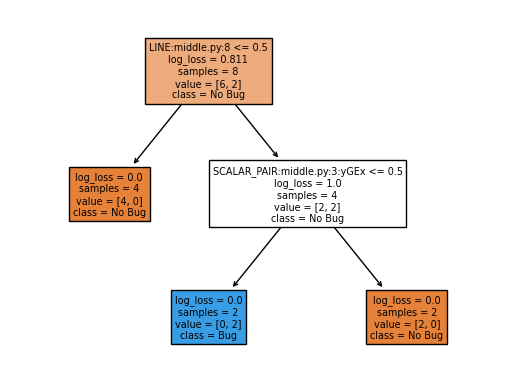

In [62]:
tree.plot_tree(
    oracle.model, 
    feature_names=list(map(lambda f: f.name, all_features)), 
    class_names=["No Bug", "Bug"], 
    filled=True
)